In [1]:
import tensorflow as tf
import keras 

In [2]:
#Findout the physical devices
tf.config.experimental.list_physical_devices('CPU')

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]

In [3]:
import tensorflow as tf
from tensorflow.keras import layers,models,datasets
import matplotlib.pyplot as plt
import numpy as np

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
!pip install unrar
!unzip  '/content/drive/MyDrive/Datasets/Happy or Sad.zip'

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Archive:  /content/drive/MyDrive/Datasets/Happy or Sad.zip
replace Happy or Sad/Happy People/-icon-transparent-card-positive-human-face-expression-good-emotion-140634618.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [4]:
import cv2
import imghdr
import os

In [5]:
data_dir='/content/Happy or Sad'

In [6]:
os.listdir(os.path.join(data_dir,'Happy People'))

['1902544.jpg',
 'group-of-happy-people-with-banner-stock-photos_csp9809823.jpg',
 'posing-with-laptop-indoor-photo-amazed-male-freelancer-isolated_197531-20164.jpg',
 'df7d52e420225d58720401057e7a573b--funny-as-hell-lets-dance.jpg',
 'curly-funny-male-model-jumping-laughing-joyful-young-man-t-shirt-jeans-dancing_197531-20324.jpg',
 'pexels-photo-4126783.jpeg',
 'images3.jpg',
 'happy-person-nature-raised-arms-young-147569464.jpg',
 '1687d86811a2c25b877448ed47218131.png',
 'image5.jpeg',
 'pexels-photo-4153191.jpeg',
 'Happy_family_28129.jpg',
 '-pink-background-portrait-pretty-happy-person-using-phone-isolated-156961699.jpg',
 '1902542.jpg',
 '8e06de1bf2171da2312b6de61c61e4bc--baby-essentials-baby-baby.jpg',
 'e6c8d72d91141c6659b6cff32c3462a6.jpg',
 'happy-people-funny-isolated-over-white-background-35582466.jpg',
 '1280px-Happy_Independence2C_Vanuatu21_28129_28Imagicity_37829.jpg',
 'images11.jpg',
 '1902547.jpg',
 'happy-people-children-eps-vector_csp21848249.jpg',
 'happy-person-sh

In [7]:
image_ext=['jpeg','png','jpg','bmp']
image_ext

['jpeg', 'png', 'jpg', 'bmp']

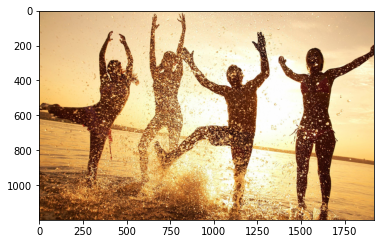

In [8]:
img=cv2.imread(os.path.join(data_dir,'Happy People','1902539.jpg'))
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))

In [9]:
#Remove wrong formated images
for image_class in os.listdir(data_dir):
  for image in os.listdir(os.path.join(data_dir,image_class)):
    image_path=os.path.join(data_dir,image_class,image)
    try:
      img=cv2.imread(image_path)
      tip=imghdr.what(image_path)
      if tip not in image_ext:
        print("Image is not in the ext {}".format(image_path))
        os.remove(image_path)
    except Exception as e:
      print("Issue with image {}".format(image_path))

In [10]:
#Loading data by using keras.utils 
#Pipline
data=keras.utils.image_dataset_from_directory(data_dir)

Found 148 files belonging to 2 classes.


In [11]:
data

<BatchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [12]:
#Access the pipline
data_iterator=data.as_numpy_iterator()

In [13]:
batch=data_iterator.next()

In [14]:
batch

(array([[[[  0.       ,   0.       ,   0.       ],
          [  0.       ,   0.       ,   0.       ],
          [  0.       ,   0.       ,   0.       ],
          ...,
          [  0.       ,   0.       ,   0.       ],
          [  0.       ,   0.       ,   0.       ],
          [  0.       ,   0.       ,   0.       ]],
 
         [[  0.       ,   0.       ,   0.       ],
          [  0.       ,   0.       ,   0.       ],
          [  0.       ,   0.       ,   0.       ],
          ...,
          [  0.       ,   0.       ,   0.       ],
          [  0.       ,   0.       ,   0.       ],
          [  0.       ,   0.       ,   0.       ]],
 
         [[  0.       ,   0.       ,   0.       ],
          [  0.       ,   0.       ,   0.       ],
          [  0.       ,   0.       ,   0.       ],
          ...,
          [  0.       ,   0.       ,   0.       ],
          [  0.       ,   0.       ,   0.       ],
          [  0.       ,   0.       ,   0.       ]],
 
         ...,
 
         [[ 

In [15]:
len(batch)

2

In [16]:
batch[0].shape

(32, 256, 256, 3)

In [17]:
batch[1]

array([1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 0, 0], dtype=int32)

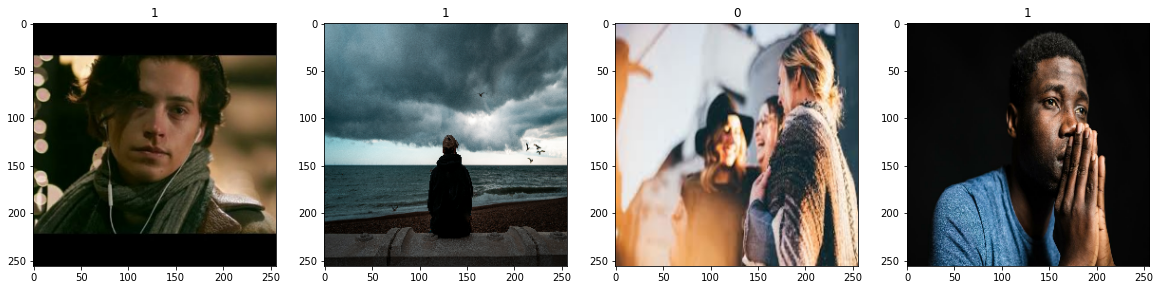

In [18]:
fit,ax=plt.subplots(ncols=4,figsize=(20,20))
for idx,img in enumerate(batch[0][:4]):
  ax[idx].imshow(img.astype(int))
  ax[idx].title.set_text(batch[1][idx])

### Preprocessing

In [19]:
#Scale the data

In [20]:
batch[0].max()

255.0

In [21]:
scale_data=batch[0]/255

In [22]:
scale_data.max()

1.0

In [23]:
#Through Pipline
data=data.map(lambda x,y:(x/255,y))

In [24]:
scaled_iterator=data.as_numpy_iterator()

In [25]:
scaled_iterator.next()[1].max(
)

1

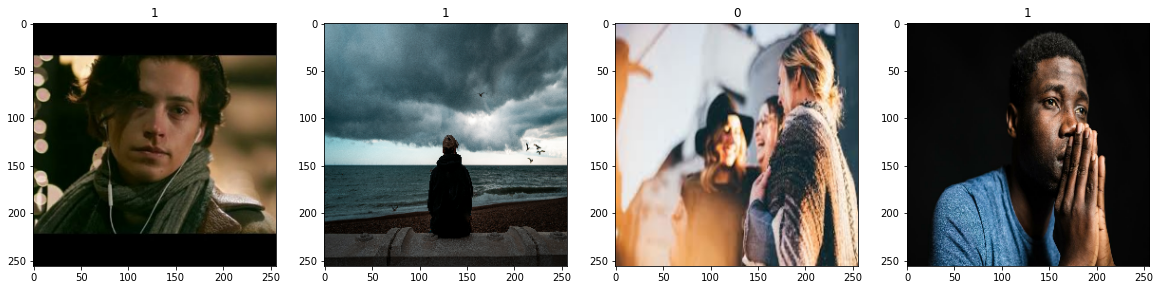

In [26]:
fit,ax=plt.subplots(ncols=4,figsize=(20,20))
for idx,img in enumerate(batch[0][:4]):
  ax[idx].imshow(img.astype(int))
  ax[idx].title.set_text(batch[1][idx])

In [27]:
#Spliting the data
len(data)

5

In [28]:
#Spliting the data
train_data=int(len(data)*.7)
val_data=int(len(data)*.2)
test_data=int(len(data)*.1)+1

In [29]:
test_data+val_data+train_data

5

In [30]:
train=data.take(train_data)
val=data.skip(train_data).take(val_data)
test=data.skip(val_data+train_data).take(test_data)

In [31]:
#Building a model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Dense,Dropout,MaxPool2D,Flatten

In [32]:
model=Sequential()

model.add(Conv2D(16,(3,3),1,activation='relu',input_shape=(256,256,3)))
model.add(MaxPool2D())

model.add(Conv2D(32,(3,3),1,activation='relu'))
model.add(MaxPool2D())

model.add(Conv2D(16,(3,3),1,activation='relu'))
model.add(MaxPool2D())

model.add(Flatten())

model.add(Dense(units=256,activation='relu'))
model.add(Dense(units=1,activation='sigmoid'))

In [33]:
#Compiling
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [34]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 16)       0

In [35]:
es=tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0,
    patience=1,
    verbose=1,
    mode="max",
)

In [36]:
hist=model.fit(train,validation_data=val,epochs=10)

Epoch 1/10
3/3 [==============================] - 15s 4s/step - loss: 0.7742 - accuracy: 0.4375 - val_loss: 0.6086 - val_accuracy: 0.7188
Epoch 2/10
3/3 [==============================] - 15s 5s/step - loss: 0.6479 - accuracy: 0.6458 - val_loss: 0.5161 - val_accuracy: 0.8750
Epoch 3/10
3/3 [==============================] - 23s 6s/step - loss: 0.5544 - accuracy: 0.7917 - val_loss: 0.4780 - val_accuracy: 0.8438
Epoch 4/10
3/3 [==============================] - 18s 5s/step - loss: 0.4415 - accuracy: 0.8021 - val_loss: 0.4373 - val_accuracy: 0.7500
Epoch 5/10
3/3 [==============================] - 14s 4s/step - loss: 0.4482 - accuracy: 0.7917 - val_loss: 0.3519 - val_accuracy: 0.8750
Epoch 6/10
3/3 [==============================] - 14s 4s/step - loss: 0.3579 - accuracy: 0.8542 - val_loss: 0.3148 - val_accuracy: 0.8750
Epoch 7/10
3/3 [==============================] - 19s 6s/step - loss: 0.3054 - accuracy: 0.8958 - val_loss: 0.2500 - val_accuracy: 0.9062
Epoch 8/10
3/3 [==================

In [37]:
hist.history

{'loss': [0.774230420589447,
  0.6479116082191467,
  0.5544412732124329,
  0.44148680567741394,
  0.4481619894504547,
  0.3578997850418091,
  0.3054075539112091,
  0.23790840804576874,
  0.1721055507659912,
  0.21687261760234833],
 'accuracy': [0.4375,
  0.6458333134651184,
  0.7916666865348816,
  0.8020833134651184,
  0.7916666865348816,
  0.8541666865348816,
  0.8958333134651184,
  0.9375,
  0.9583333134651184,
  0.8854166865348816],
 'val_loss': [0.6086273193359375,
  0.5160771608352661,
  0.47803956270217896,
  0.437301367521286,
  0.351863831281662,
  0.3147643804550171,
  0.24999716877937317,
  0.20577743649482727,
  0.12769579887390137,
  0.14057058095932007],
 'val_accuracy': [0.71875,
  0.875,
  0.84375,
  0.75,
  0.875,
  0.875,
  0.90625,
  0.96875,
  0.96875,
  0.96875]}

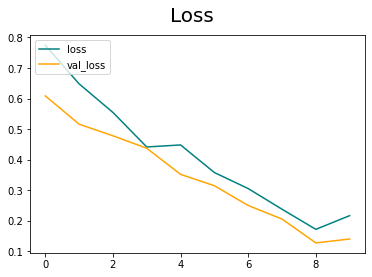

In [38]:
#Performance check
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

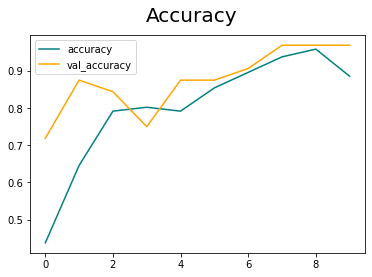

In [39]:
#Accuracy plot
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [40]:
#Evaluation
from tensorflow.keras.metrics import Recall,Precision,BinaryAccuracy

In [41]:
re=Recall()
pre=Precision()
acc=BinaryAccuracy()

In [42]:
for batch in test.as_numpy_iterator():
  x,y=batch
  yhat=model.predict(x)
  pre.update_state(y,yhat)
  re.update_state(y,yhat)
  acc.update_state(y,yhat)

1/1 [==============================] - 0s 417ms/step


In [43]:
print(f'Precison: {pre.result()},Recall: {re.result()},Accuracy: {acc.result()}')

Precison: 0.875,Recall: 1.0,Accuracy: 0.949999988079071


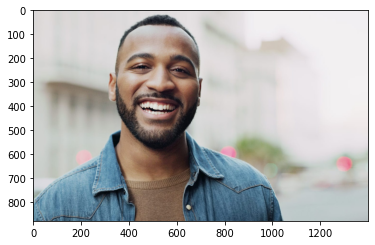

In [64]:
img=cv2.imread('/content/05-12-21-happy-people.jpg')
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
plt.show()

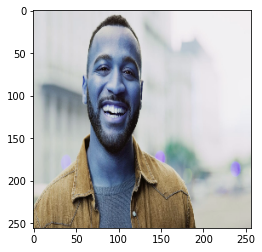

In [75]:
Happy_person = tf.image.resize(img, (256,256))
plt.imshow(Happy_person.numpy().astype(int))
plt.show()

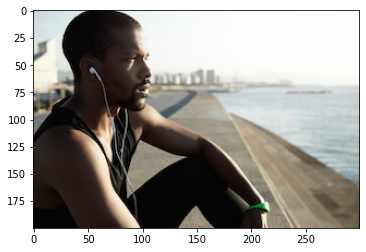

In [76]:
img1=cv2.imread('/content/Sad_music.jpg')
plt.imshow(cv2.cvtColor(img1,cv2.COLOR_BGR2RGB))
plt.show()

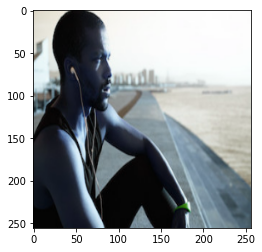

In [77]:
Sad_person = tf.image.resize(img1, (256,256))
plt.imshow(Sad_person.numpy().astype(int))
plt.show()

In [79]:
#Predict
yhat=model.predict(np.expand_dims(Happy_person/255,0))

1/1 [==============================] - 0s 45ms/step


In [80]:
yhat

array([[0.17980668]], dtype=float32)

In [81]:
if yhat>0.5:
  print("Person is Sad")
else:
  print("Person is Happy")

Person is Happy


In [69]:
#Saving the model
from tensorflow.keras.models import load_model

In [70]:
model.save(os.path.join('models','HappyOrSad.h5'))

In [71]:
#Upload again the same model
new_model=load_model(os.path.join('models','HappyOrSad.h5'))

In [78]:
yhat=new_model.predict(np.expand_dims(Happy_person/255,0))
if yhat>0.5:
  print("Person is Sad")
else:
  print("Person is Happy")

1/1 [==============================] - 0s 40ms/step
Person is Happy
